In [9]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
macd, signal, hist = ta.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['Signal'] = signal
df['Hist'] = hist
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X_MA = df[['MACD']].values
X_SG = df[['Signal']].values
X_HS = df[['Hist']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_MA_train, X_MA_test, Y_MA_train, Y_MA_test = train_test_split(X_MA, Y, 
                                                    test_size=0.2, shuffle=False, 
                                                                random_state=0)
X_SG_train, X_SG_test, Y_SG_train, Y_SG_test = train_test_split(X_SG, Y, 
                                                    test_size=0.2, shuffle=False,
                                                                random_state=0)
X_HS_train, X_HS_test, Y_HS_train, Y_HS_test = train_test_split(X_HS, Y, 
                                                    test_size=0.2, shuffle=False,
                                                                random_state=0)

# X 학습 테스트
X_MA_train = scaler.fit_transform(X_MA_train)
X_MA_test = scaler.fit_transform(X_MA_test)

X_SG_train = scaler.fit_transform(X_SG_train)
X_SG_test = scaler.fit_transform(X_SG_test)

X_HS_train = scaler.fit_transform(X_HS_train)
X_HS_test = scaler.fit_transform(X_HS_test)

# Y 학습 테스트
Y_MA_train = scaler.fit_transform(Y_MA_train.reshape(-1, 1)).flatten()
Y_MA_test = scaler.fit_transform(Y_MA_test.reshape(-1, 1)).flatten()

Y_SG_train = scaler.fit_transform(Y_SG_train.reshape(-1, 1)).flatten()
Y_SG_test = scaler.fit_transform(Y_SG_test.reshape(-1, 1)).flatten()

Y_HS_train = scaler.fit_transform(Y_HS_train.reshape(-1, 1)).flatten()
Y_HS_test = scaler.fit_transform(Y_HS_test.reshape(-1, 1)).flatten()


# 전체 비교용 X Y
X_MA_scaled = scaler.fit_transform(X_MA)
X_SG_scaled = scaler.fit_transform(X_SG)
X_HS_scaled = scaler.fit_transform(X_HS)

Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 모델 구축
model_MA = LinearRegression()
model_SG = LinearRegression()
model_HS = LinearRegression()

# 모델 학습
model_MA.fit(X_MA_train, Y_MA_train)
model_SG.fit(X_SG_train, Y_SG_train)
model_HS.fit(X_HS_train, Y_HS_train)

# 테스트 데이터 예측
Y_MA_pred = model_MA.predict(X_MA_test)
Y_SG_pred = model_SG.predict(X_SG_test)
Y_HS_pred = model_HS.predict(X_HS_test)

Y_MA_pred_all = model_MA.predict(X_MA_scaled)
Y_SG_pred_all = model_MA.predict(X_SG_scaled)
Y_HS_pred_all = model_MA.predict(X_HS_scaled)

# 예측 결과 역스케일링
Y_MA_pred_scaled = scaler.inverse_transform(Y_MA_pred.reshape(-1, 1)).flatten()
Y_MA_pred_scaled_all = scaler.inverse_transform(Y_MA_pred_all.reshape(-1, 1)).flatten()

Y_SG_pred_scaled = scaler.inverse_transform(Y_SG_pred.reshape(-1, 1)).flatten()
Y_SG_pred_scaled_all = scaler.inverse_transform(Y_SG_pred_all.reshape(-1, 1)).flatten()

Y_HS_pred_scaled = scaler.inverse_transform(Y_HS_pred.reshape(-1, 1)).flatten()
Y_HS_pred_scaled_all = scaler.inverse_transform(Y_HS_pred_all.reshape(-1, 1)).flatten()

Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_MA_pred_scaled)
print(Y_SG_pred_scaled)
print(Y_HS_pred_scaled)

[23588793.16921354 23762560.01270116 24311698.79558194 24328807.94861238
 24151782.30388136 24129275.36745859 24248652.72816028 23988691.90489823
 24869674.50759311 23962032.22068829 22971284.59695324 21977853.95912765
 20319406.44664883 17029919.57352019 14618908.3329914  12478964.05304818
 10414031.076036    9028373.59100799  8563116.89123235  8958787.67243629
  8585391.13556345  8532510.48978722  7529063.3804801   7927293.61318885
  7918949.19769048  8310861.76270738  9357077.41575211  9573871.89299212
 10187793.44414083 10948554.99123231 11603916.79589702 11862407.34269433
 12375083.29468289 13163885.30389782 15173891.40039688 17118927.7937094
 17647982.86779284 18481797.21601545 18959579.63964548 19489814.90991192
 20050100.57308541 21463530.84032853 22587675.98930276 23092722.62247927
 23380439.14508952 23316734.63407943 23029563.66434    21577295.67623104
 17557892.39321989 14242713.47739121 12054556.01037733  9229644.82419458
  7309306.63743263  4991760.93879407  4315970.776844

In [5]:
r2_train_MA = r2_score(Y_MA_train, model_MA.predict(X_MA_train))
r2_test_MA = r2_score(Y_MA_test, Y_MA_pred)

r2_train_SG = r2_score(Y_SG_train, model_SG.predict(X_SG_train))
r2_test_SG = r2_score(Y_SG_test, Y_SG_pred)

r2_train_HS = r2_score(Y_HS_train, model_HS.predict(X_HS_train))
r2_test_HS = r2_score(Y_HS_test, Y_HS_pred)

print(f"[r2_score with MACD] train : {r2_train_MA} / test : {r2_test_MA}")
print(f"[r2_score with Signal] train : {r2_train_SG} / test : {r2_test_SG}")
print(f"[r2_score with Hist] train : {r2_train_HS} / test : {r2_test_HS}")

# mse
mse_MA = mean_squared_error(Y_MA_test, Y_MA_pred)
mse_SG= mean_squared_error(Y_SG_test, Y_SG_pred)
mse_HS = mean_squared_error(Y_HS_test, Y_HS_pred)

# rmse
rmse_MA = np.sqrt(mse_MA)
rmse_SG = np.sqrt(mse_SG)
rmse_HS = np.sqrt(mse_HS)

print(f'[MSE with MACD] : {mse_MA:.3f}\n[RMSE with MACD] : {rmse_MA:.3f}')
print(f'[MSE with Signal] : {mse_SG:.3f}\n[RMSE with Signal] : {rmse_SG:.3f}')
print(f'[MSE with Hist] : {mse_HS:.3f}\n[RMSE with Hist] : {rmse_HS:.3f}')

[r2_score with MACD] train : 0.05096866802647493 / test : -0.2021646012916518
[r2_score with Signal] train : 0.06020273082424987 / test : -0.254538548075558
[r2_score with Hist] train : 0.0008797192737833859 / test : -0.11978684564759678
[MSE with MACD] : 0.054
[RMSE with MACD] : 0.232
[MSE with Signal] : 0.056
[RMSE with Signal] : 0.237
[MSE with Hist] : 0.050
[RMSE with Hist] : 0.224


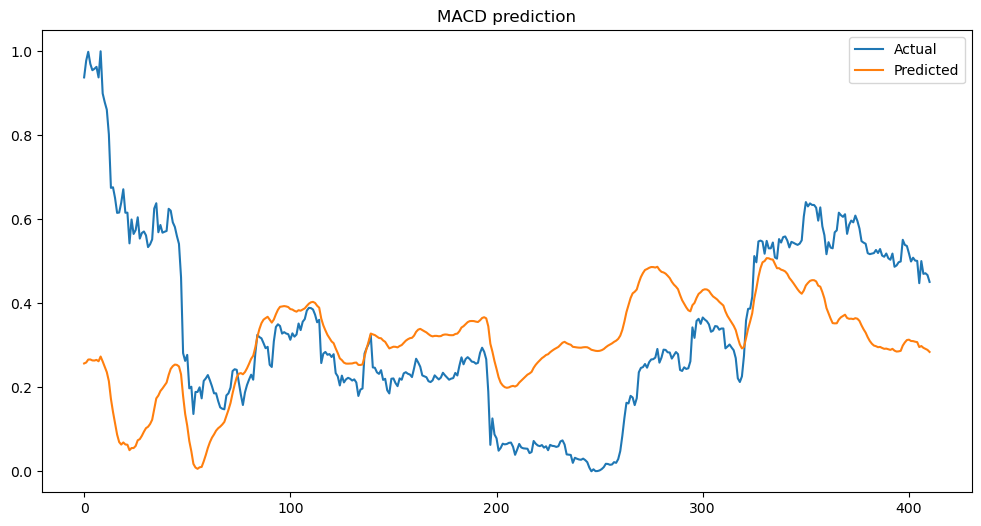

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(Y_MA_test, label='Actual')
plt.plot(Y_MA_pred, label='Predicted')
plt.title('MACD prediction')
#plt.axvline(133, 0, 1, color='lightgray', linestyle='--')
plt.legend()
plt.show()

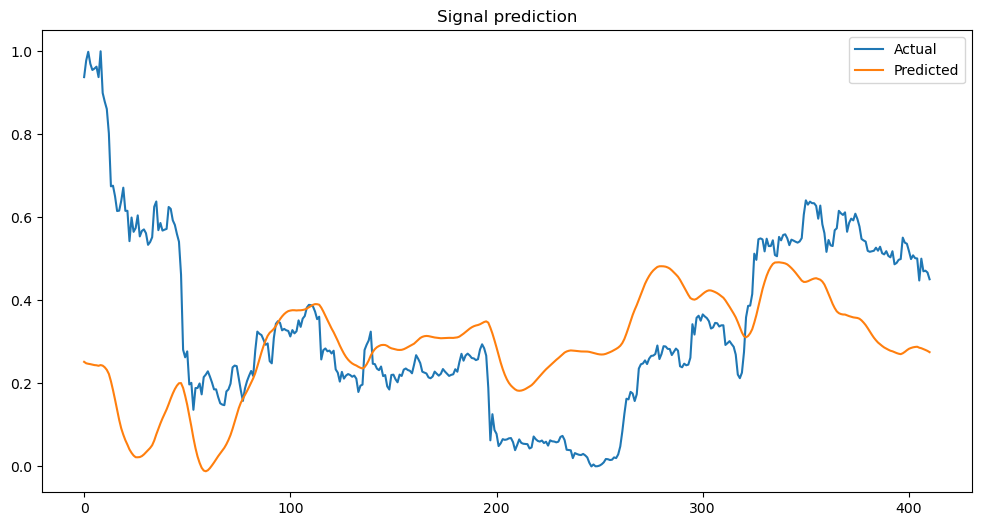

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(Y_SG_test, label='Actual')
plt.plot(Y_SG_pred, label='Predicted')
plt.title('Signal prediction')
plt.legend()
plt.show()

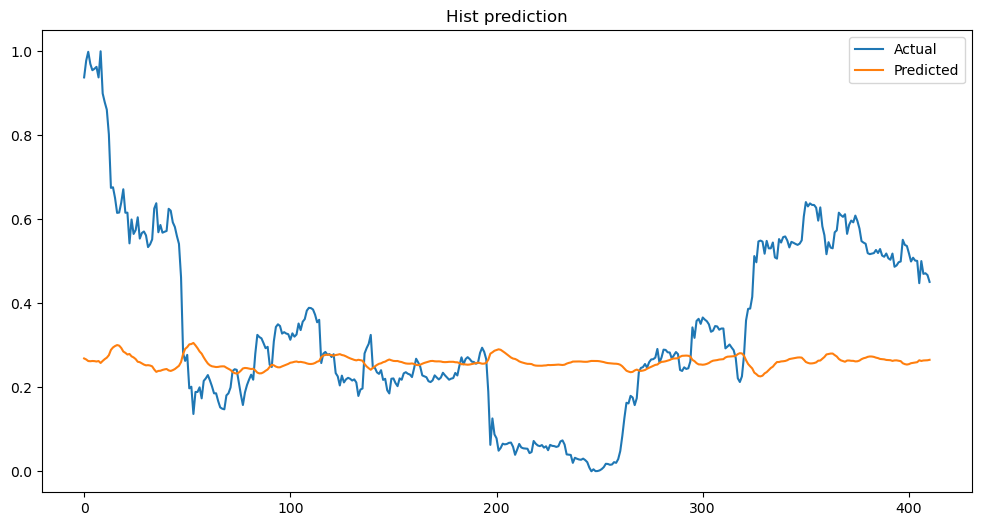

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(Y_HS_test, label='Actual')
plt.plot(Y_HS_pred, label='Predicted')
plt.title('Hist prediction')
plt.legend()
plt.show()

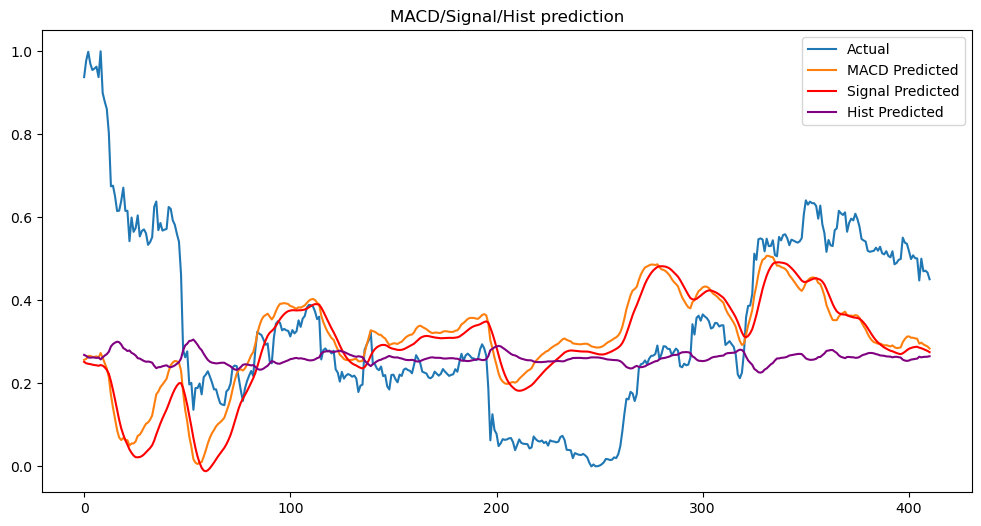

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(Y_HS_test, label='Actual')
plt.plot(Y_MA_pred, label='MACD Predicted')
plt.plot(Y_SG_pred, label='Signal Predicted', color='red')
plt.plot(Y_HS_pred, label='Hist Predicted', color='purple')
plt.title('MACD/Signal/Hist prediction')
plt.legend()
plt.show()